This is the main take-aways from reading https://scholar.google.com/citations?user=8OYE6iEAAAAJ [ble2003]

#### Latent dirichlet allocation
DM Blei, AY Ng, MI Jordan, Journal of machine Learning research 3 (Jan), 993-1022

#### Abstract

*We describe latent Dirichlet allocation (LDA), **a generative probabilistic model** for collections of **discrete data** such as text corpora. LDA is **a three-level hierarchical Bayesian model**, in which each item of a collection is modeled as a finite mixture over an underlying set of topics. Each topic is, in turn, modeled as an infinite mixture over an underlying set of topic probabilities. In the context of text modeling, the topic probabilities provide an explicit representation of a document. We present efficient approximate inference techniques based on variational methods and an EM algorithm for empirical Bayes parameter estimation. We report results in document modeling, text classification, and collaborative filtering, comparing to a mixture of unigrams model and the probabilistic LSI model.*

#### Origin / predecessors

- TF-IDF
- LSI (uses SVD on TF-IDF)
- pLSD (probabalistic LSI)
- The "de Finetti theorem": "*any collection of exchangeable random variables has a representation as a mixture distribution*"





In [6]:
%%html
<style>
tr, .rendered_html th, .rendered_html td { text-align: left; }
</style>

### The basic idea
*Assumes that documents are represented as random mixtures over latent topics. Each topic is characterized by a distribution over words. LDA assumes the following generative process for each document $w$ in a corpus $D$*:

1. Choose $N ∼ Poisson(ξ)$.
2. Choose $θ ∼ Dir(α)$.
3. For each of the $N$ words $w_n$:

    1. Choose a topic $z_n ∼ Multinomial(θ)$.
    2. Choose a word $w_n$ from $p(w_n|z_n, β)$, a multinomial probability conditioned on the topic $z_n$



Symbol | Name | Description  
:- |---: |-:
$V$||The size of the vocabulary
$N$||Number of words in a document.
$M$||Number of documents in the corpus.
$\mathrm{z}$||Topic variable.
$\mathrm{k}$||Dimensionality of $\mathrm{z}$ i.e. number of topics. Also size of vector $\alpha$). Fixed and known.
$\alpha$|alpha|$\alpha$ is a k-sized vector, where $\alpha_{i} > 0$
$\beta$|beta|The word probabilities per topic, a $\mathrm{k}\space\times\space\mathrm{V}$ matrix where $\beta_{ij} = p(w^{j}\space|\space z^{i})$.<br>This is a quantity to be estimated!
$\Gamma$, $\gamma$|gamma function|A generalization of the factorial function.<br>Interpolates points (x, y) given by y = (x − 1)! for positive integer values for x.<br>It can be proven that $\Gamma (z+1)=z\,\Gamma (z)$.
$\theta$|theta|A **k-dimensional** Dirichlet random variable $\theta$ in the (k − 1)-simplex (vector that sums to 1).<br> Dir(\alpha) is a distribution specified by a vector  $\alpha$ containing some $α_i$ corresponding to each topic $i$. \begin{equation}
p(\theta\space∣\space \alpha)=\frac{\Gamma(\sum_{i=1}^k\alpha_i)}{\prod_{i=1}^k\Gamma(\alpha_i)}\times \prod_{i=1}^k\theta^{α_i−1}
\end{equation}
$H$, $\eta$|eta|x
$\Phi$, $\phi$|phi|x
$\xi$|xi|x
$P$, $\rho$|rho|x


- The formula for computing the PDF for each topic vector $\theta$ is proportional to the product over all topics $i$ of $\theta_i\times\alpha_i$.
- $\theta_i$ is the probability that the topic is $i$, so the items in $\theta$ must sum to 1.
- The Dirichlet is a convenient distribution on the simplex — it is in the exponential family, has finite dimensional sufficient statistics, and is conjugate to the multinomial distribution
- A variable that is infered rather than directly observing is a “latent variable”. We’re observing the words - not the topics - so the topics themselves are latent variables (along with the distributions themselves).
- Bayes rule are used to infer latent variables:
\begin{equation}
P(A\space|\space B)=\frac{P(B\space |\space A)}{P(A)\times P(B)}
\end{equation}

\begin{equation}
  P(\omega_j|x) = \frac{p(x|\omega_j) \cdot P(\omega_j)}{p(x)}
   \Rightarrow \text{posterior probability} = \frac{ \text{likelihood}  \cdot \text{prior probability}}{\text{evidence}}
\end{equation}
   

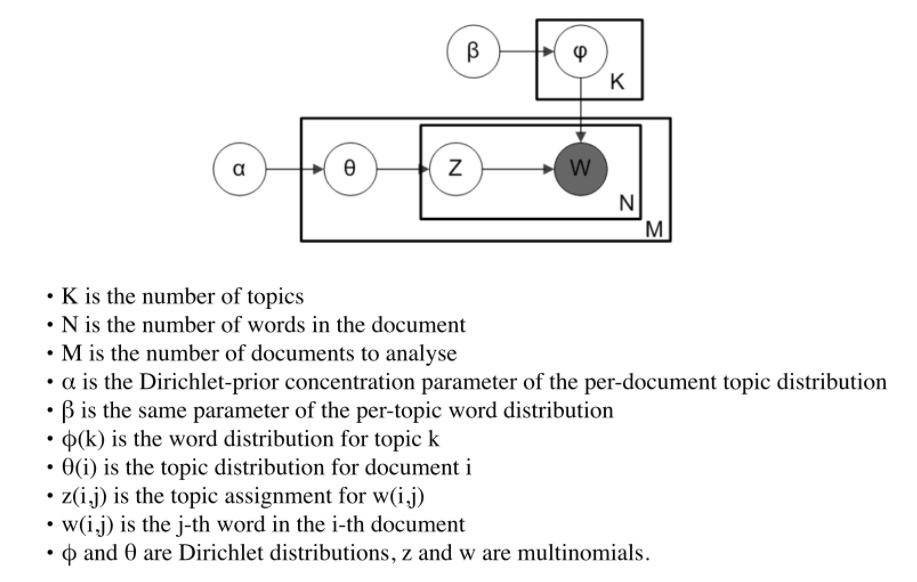

http://chdoig.github.io/pytexas2015-topic-modeling/#/3/2
http://chdoig.github.io/pytexas2015-topic-modeling/#/3/4
http://chdoig.github.io/pytexas2015-topic-modeling/#/3/12
http://chdoig.github.io/pytexas2015-topic-modeling/#/6
http://chdoig.github.io/pytexas2015-topic-modeling/#/6/1


### Example: Maximum Likelihood Estimation

**Step \#1**
Select a (parametric) class of probability distributions $D$ that is believed to generate the data. Our aim is to find an estimate of the parameters given the data.
**Step \#2**
Using the data, select a particular distribution from the class 
This can for instance be the class of all normal or gamma distributions. Or the class of Poisson distributions defined by PMF:

\begin{equation}
P(y,\mu) = \frac{\mu^y}{y!}\times e^{-\mu}
\end{equation}





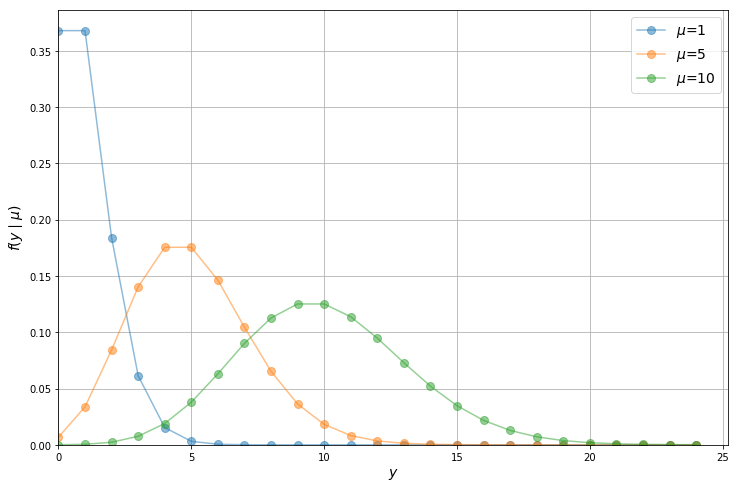

In [3]:
from numpy import exp
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

poisson_pmf = lambda y, mu: mu**y / factorial(y) * exp(-mu)
y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for mu in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, mu))
    ax.plot(y_values, distribution, label=('$\mu$=' + str(mu)),
            alpha=0.5, marker='o', markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

https://www.youtube.com/watch?v=_R66X_udxZQ https://github.com/tdhopper/pydata-nyc-2015